Plant Disease Detection

First we begin to import 3 classes of data, the training data, the validation data and the test data.


In [ ]:

import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = '/content/drive/MyDrive/CNN/train/train_healthy'
train_files_septoria = '/content/drive/MyDrive/CNN/train/train_septoria'
train_files_yellow_leaf_curl = '/content/drive/MyDrive/CNN/train/train_yellow_leaf_curl'

test_files_healthy = '/content/drive/MyDrive/CNN/test/test_healthy'
test_files_septoria = '/content/drive/MyDrive/CNN/test/test_septoria'
test_files_yellow_leaf_curl = '/content/drive/MyDrive/CNN/test/test_yellow_leaf_curl'

valid_files_healthy = '/content/drive/MyDrive/CNN/validation/validation_healthy'
valid_files_septoria = '/content/drive/MyDrive/CNN/validation/validation_septoria'
valid_files_yellow_leaf_curl = '/content/drive/MyDrive/CNN/validation/validation_yellow_leaf_curl'

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_septoria))
print("Number of rusty leaf images in training set", total_files(train_files_yellow_leaf_curl))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_septoria))
print("Number of rusty leaf images in test set", total_files(test_files_yellow_leaf_curl))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_septoria))
print("Number of rusty leaf images in validation set", total_files(valid_files_yellow_leaf_curl))

Number of healthy leaf images in training set 500
Number of powder leaf images in training set 500
Number of rusty leaf images in training set 500
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


We then prep the training and validation data to be consistent size wise.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

After which we apply it.

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/CNN/train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/CNN/validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1500 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


Then we begin to train the model using Adam, and categorical crossentropy.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Using epochs we aim to improve the accuracy and decrease loss.

In [ ]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5
47/47 [==============================] - 241s 5s/step - loss: 0.9284 - accuracy: 0.6367 - val_loss: 0.4850 - val_accuracy: 0.7667
Epoch 2/5
47/47 [==============================] - 82s 2s/step - loss: 0.3954 - accuracy: 0.8393 - val_loss: 0.4508 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 81s 2s/step - loss: 0.2995 - accuracy: 0.8780 - val_loss: 0.5467 - val_accuracy: 0.7667
Epoch 4/5
47/47 [==============================] - 81s 2s/step - loss: 0.3391 - accuracy: 0.8613 - val_loss: 0.4059 - val_accuracy: 0.8667
Epoch 5/5
47/47 [==============================] - 81s 2s/step - loss: 0.2544 - accuracy: 0.8993 - val_loss: 0.3142 - val_accuracy: 0.9000


Plotting a graph to help visualise where accuracy improvements can be made.

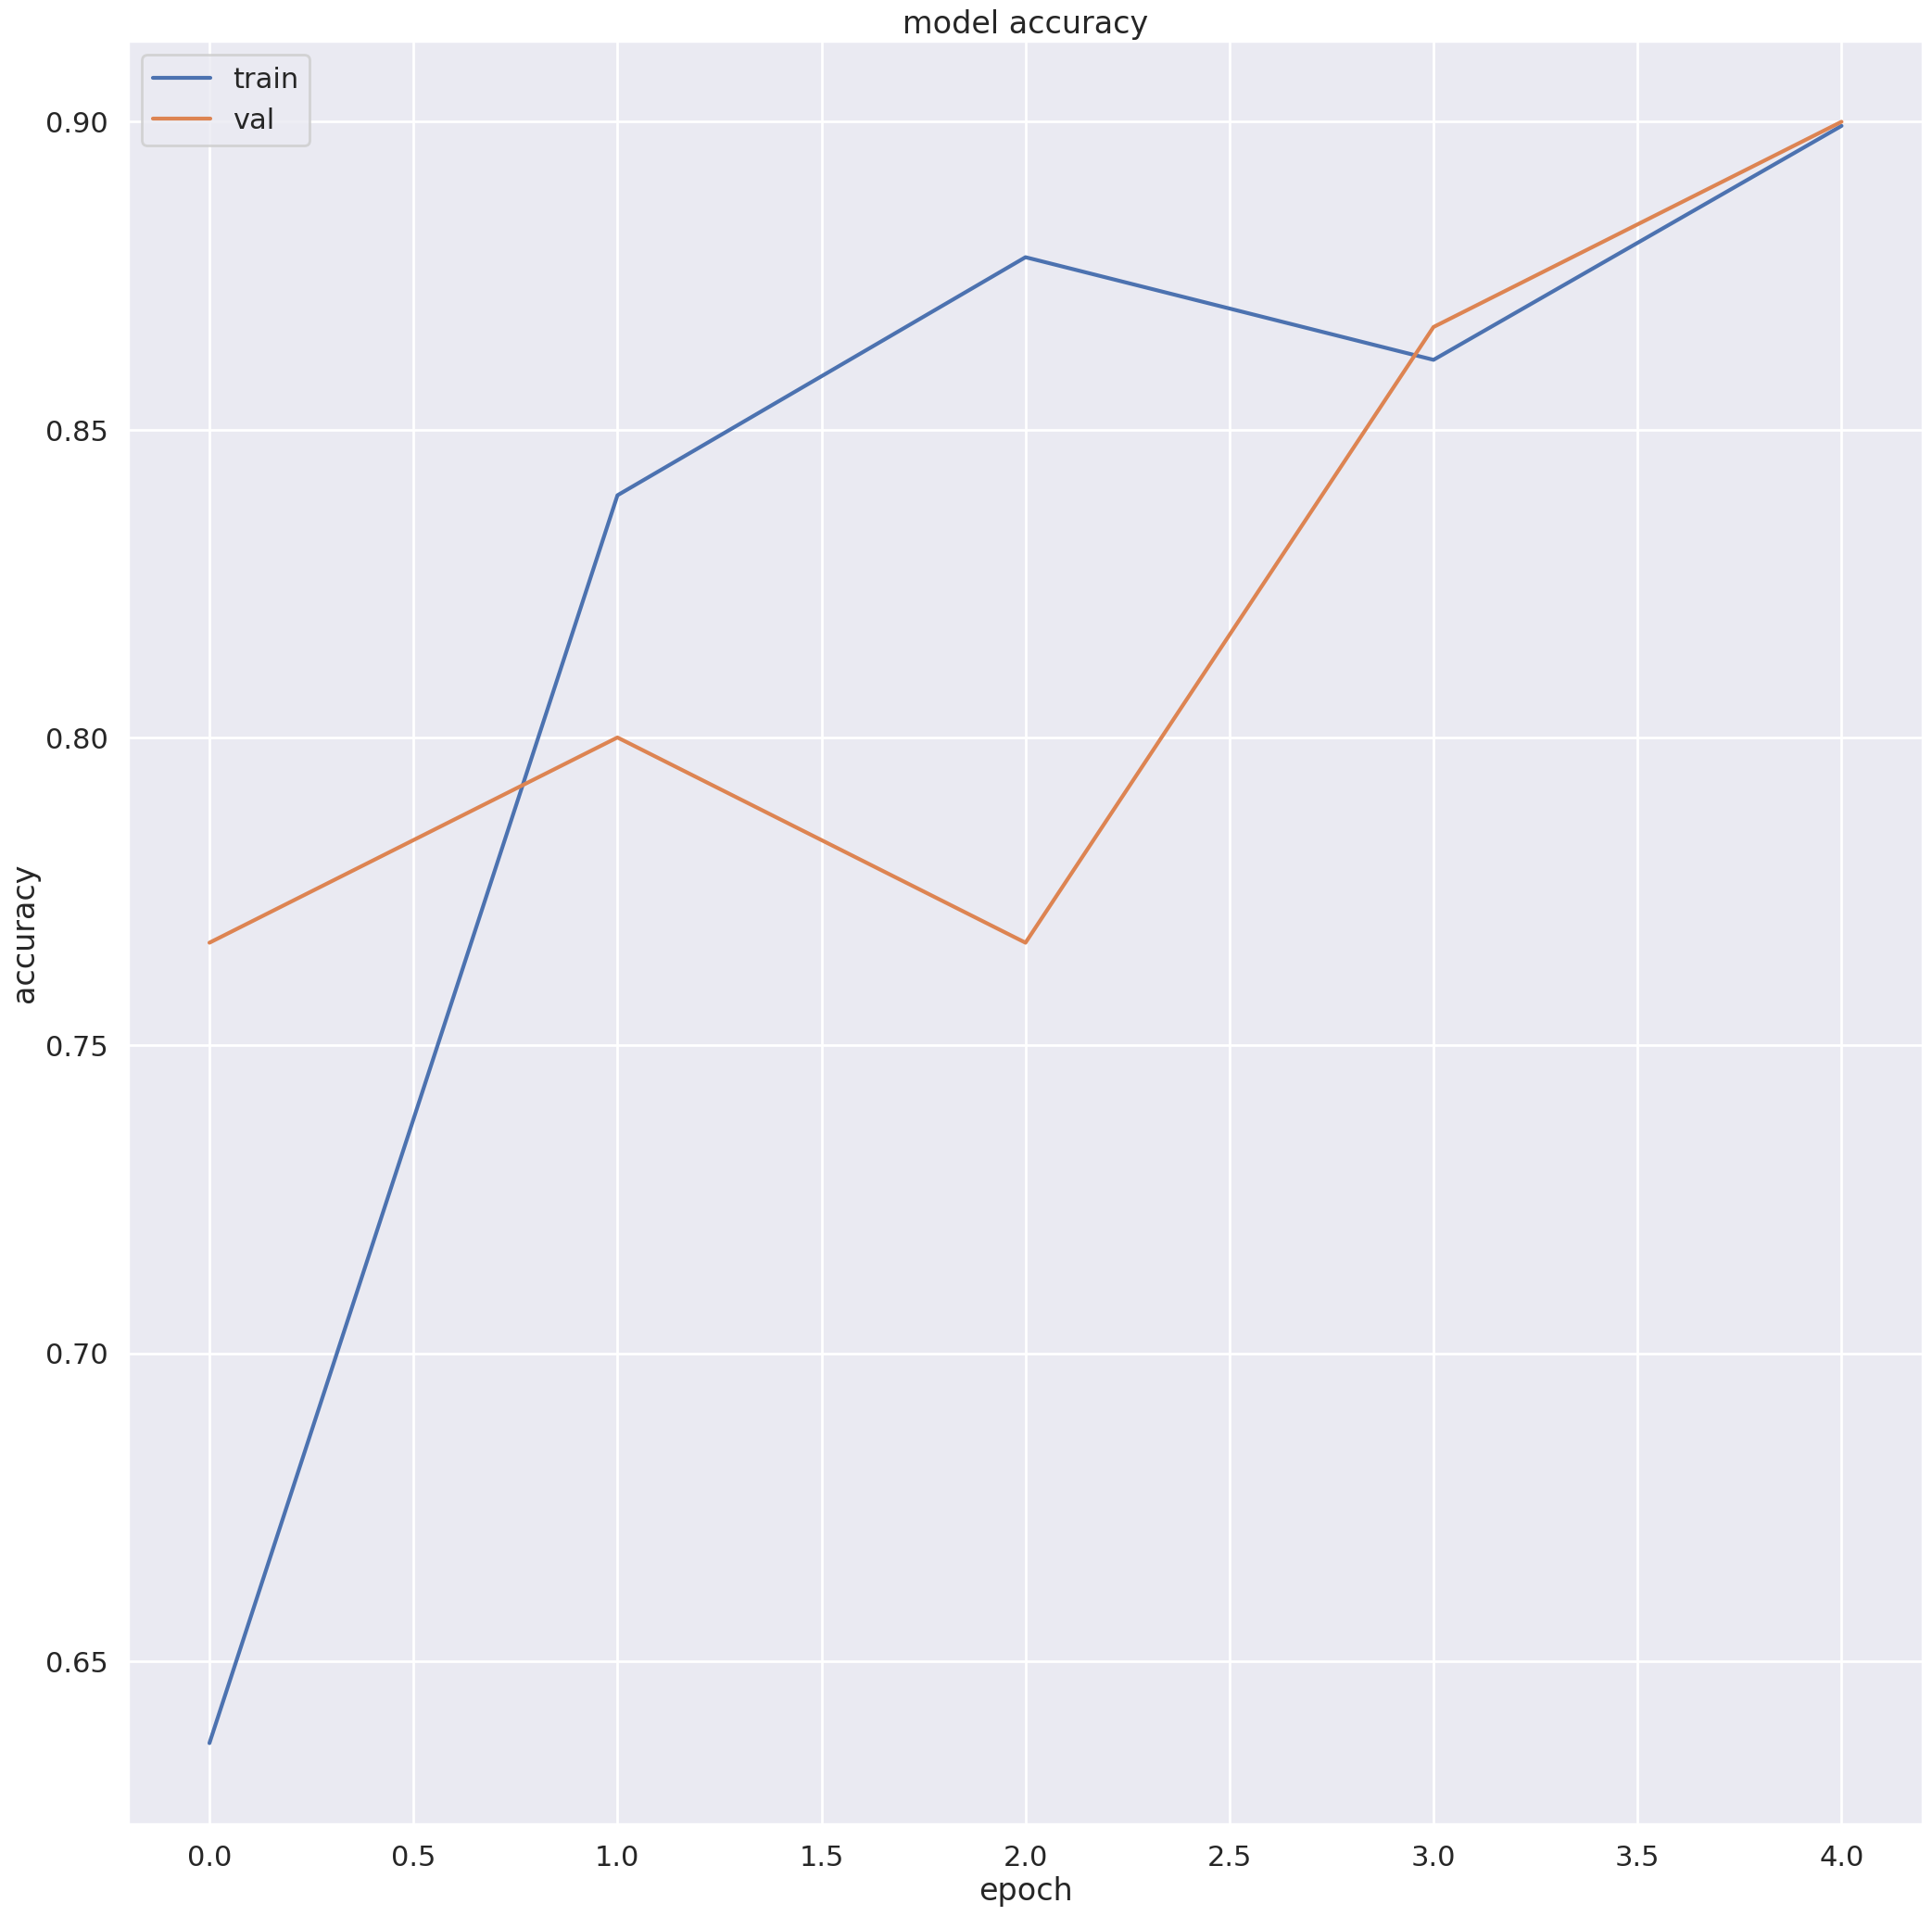

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

After which we save our model and test using our testing data.

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('/content/drive/MyDrive/CNN/test/test_septoria/54aacda6-8c9c-4112-891e-cc1612a7238d___Matt.S_CG 6290_no_bg.png')

In [ ]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 33ms/step


array([2.0143807e-05, 9.9815816e-01, 1.8217030e-03], dtype=float32)

In [ ]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'train_healthy', 1: 'train_septoria', 2: 'train_yellow_leaf_curl'}

In [ ]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

train_septoria
